In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import geoviews as gv
import geoviews.tile_sources as gvts

In [3]:
imports = pd.read_csv("/Users/mahermubarak/Desktop/Projects/Project3/ICO Coffee Data/imports.csv")
imports.head()

,imports,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,1880.0,2058.0,2206.0,1836.0,1417.0,1231.0,1210.0,1294.0,1293.0,...,1309.0,1369.0,1452.0,1559.0,1555.0,NaN,NaN,NaN,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5916.0,5924.0,5828.0,5668.0,5502.0,NaN,NaN,NaN,NaN,NaN
2,Belgium/Luxembourg,2015.0,1746.0,1828.0,2063.0,2262.0,2401.0,2526.0,2544.0,3580.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bulgaria,268.0,200.0,182.0,397.0,463.0,515.0,272.0,294.0,342.0,...,523.0,528.0,482.0,560.0,609.0,NaN,NaN,NaN,NaN,NaN
4,Croatia,NaN,NaN,168.0,163.0,193.0,320.0,322.0,385.0,339.0,...,394.0,394.0,391.0,384.0,413.0,NaN,NaN,NaN,NaN,NaN


In [4]:
imports.set_index('imports', inplace=True)
imports.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
imports,,,,,,,,,,,,,,,,,,,,,
Austria,1880.0,2058.0,2206.0,1836.0,1417.0,1231.0,1210.0,1294.0,1293.0,1500.0,...,1309.0,1369.0,1452.0,1559.0,1555.0,NaN,NaN,NaN,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3003.0,...,5916.0,5924.0,5828.0,5668.0,5502.0,NaN,NaN,NaN,NaN,NaN
Belgium/Luxembourg,2015.0,1746.0,1828.0,2063.0,2262.0,2401.0,2526.0,2544.0,3580.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulgaria,268.0,200.0,182.0,397.0,463.0,515.0,272.0,294.0,342.0,367.0,...,523.0,528.0,482.0,560.0,609.0,NaN,NaN,NaN,NaN,NaN
Croatia,NaN,NaN,168.0,163.0,193.0,320.0,322.0,385.0,339.0,352.0,...,394.0,394.0,391.0,384.0,413.0,NaN,NaN,NaN,NaN,NaN


In [5]:
country_imports_sum = imports.sum(axis=1)
country_imports_sum_sorted = country_imports_sum.sort_values(ascending=False)

country_imports_sum_sorted.head()

imports
USA               677607.093519
   Germany        392584.000000
Asia & Oceania    289605.861621
Japan             199005.981823
   Italy          160727.000000
dtype: float64

In [6]:
top_importers = country_imports_sum_sorted.reset_index()
top_importers.columns = ['Country', '1990-2018']

# Change the index name to 'Country'
top_importers.set_index('Country', inplace=True)
#top_importers.head()
top_importers['1990-2018'] = top_importers['1990-2018'].astype(int)

# Custom function to add commas every 1000th place
def add_commas(num):
    return "{:,.0f}".format(num) + ",000"

# Apply the custom function to the '1990-2018' column
top_importers['1990-2018'] = top_importers['1990-2018'].apply(add_commas)

# Display the modified DataFrame with values converted to integers (no decimals)
top_importers.head(6)

,1990-2018
Country,
USA,"677,607,000"
Germany,"392,584,000"
Asia & Oceania,"289,605,000"
Japan,"199,005,000"
Italy,"160,727,000"
France,"156,299,000"


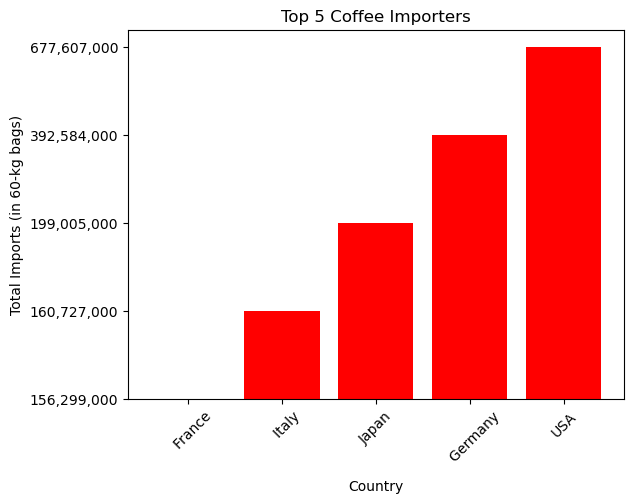

In [7]:
countries = ['   France', '   Italy', 'Japan', '   Germany', 'USA']
sum_imports = top_importers.loc[countries, '1990-2018'].sort_values(ascending=True)

plt.bar(countries, sum_imports, color='red')  # Create the bar plot

plt.title('Top 5 Coffee Importers')  # Set the title
plt.xlabel('Country')  # Set the x-axis label
plt.ylabel('Total Imports (in 60-kg bags)')  # Set the y-axis label

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

In [8]:
usa_imports = imports.loc['USA', :'29']
germany_imports = imports.loc['   Germany', :'29']
italy_imports = imports.loc['   Italy', :'29']
japan_imports = imports.loc['Japan', :'29']
france_imports = imports.loc['   France', :'29']

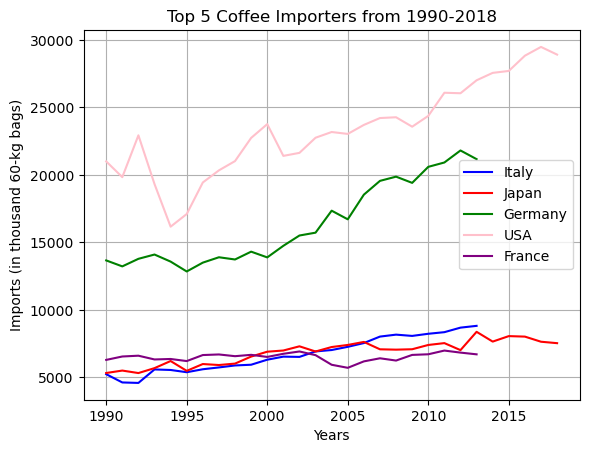

In [9]:
x_axis = [1990,1991,1992,1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
italy, = plt.plot(x_axis, italy_imports, color='blue', label='Italy')
japan, = plt.plot(x_axis, japan_imports, color='red', label='Japan')
germany, = plt.plot(x_axis, germany_imports, color='green', label='Germany')
usa, = plt.plot(x_axis, usa_imports, color='pink', label='USA')
france, = plt.plot(x_axis, france_imports, color='purple', label='France')

plt.title('Top 5 Coffee Importers from 1990-2018')
plt.xlabel('Years')
plt.ylabel('Imports (in thousand 60-kg bags)')
plt.legend()
plt.grid()
plt.show()

In [10]:
country_imports = country_imports_sum.sort_values(ascending=False)
print(country_imports.head(6))

imports
USA               677607.093519
   Germany        392584.000000
Asia & Oceania    289605.861621
Japan             199005.981823
   Italy          160727.000000
   France         156299.000000
dtype: float64


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

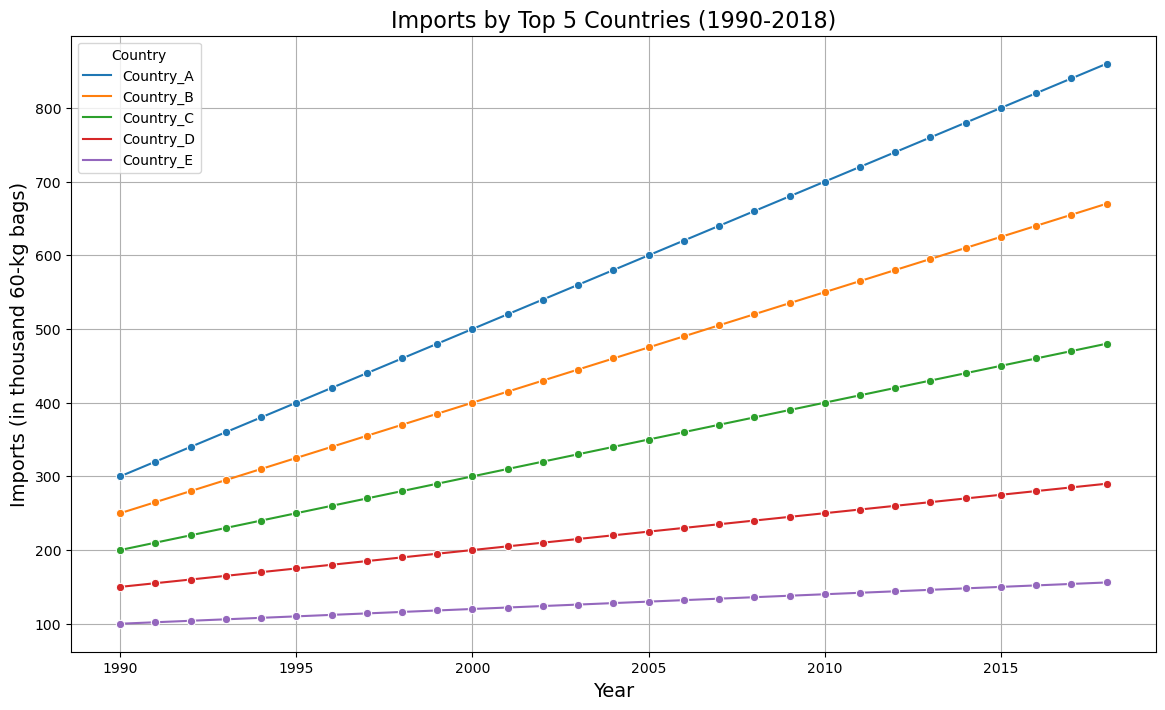

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (you would replace this with your actual data)
data = {
    'Year': list(range(1990, 2019)),
    'Country_A': [300 + 20*i for i in range(29)],
    'Country_B': [250 + 15*i for i in range(29)],
    'Country_C': [200 + 10*i for i in range(29)],
    'Country_D': [150 + 5*i for i in range(29)],
    'Country_E': [100 + 2*i for i in range(29)]
}

df = pd.DataFrame(data)

# Convert the data from wide to long format for easier plotting
df_melted = df.melt('Year', var_name='Country', value_name='Imports')

# Plotting the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted, x='Year', y='Imports', hue='Country', marker='o')

# Customize the chart
plt.title('Imports by Top 5 Countries (1990-2018)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Imports (in thousand 60-kg bags)', fontsize=14)
plt.legend(title='Country')
plt.grid(True)
plt.show()

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

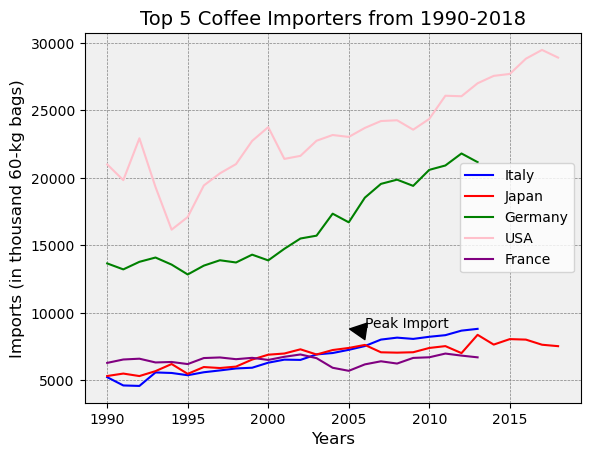

In [12]:

italy, = plt.plot(x_axis, italy_imports, color='blue', label='Italy')
japan, = plt.plot(x_axis, japan_imports, color='red', label='Japan')
germany, = plt.plot(x_axis, germany_imports, color='green', label='Germany')
usa, = plt.plot(x_axis, usa_imports, color='pink', label='USA')
france, = plt.plot(x_axis, france_imports, color='purple', label='France')
#Adjust Line Styles: Use different line styles for each line to add variety.

plt.title('Top 5 Coffee Importers from 1990-2018', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Imports (in thousand 60-kg bags)', fontsize=12)
plt.legend(fontsize=10)
#Use a Background Color: Adding a light background color to the plot area can make the lines pop.

plt.gca().set_facecolor('#f0f0f0')  # Light grey background
#Add Annotations: Highlight specific points or trends with annotations to give context.

plt.annotate('Peak Import', xy=(2005, max(italy_imports)), xytext=(2006, max(italy_imports) + 50),
             arrowprops=dict(facecolor='black', shrink=0.05))
#Customize the Grid: Make the grid lines more subtle or adjust their style to avoid overpowering the data.


plt.grid(color='grey', linestyle='--', linewidth=0.5)
#Use a Style: Leverage predefined styles for a polished look.

plt.style.use('seaborn-darkgrid')